In [10]:
# 2(a)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digit_data = load_digits()
X = digit_data.data
y = digit_data.target


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=666)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1797, 64)
(1797,)
(1257, 64)
(540, 64)
(1257,)
(540,)


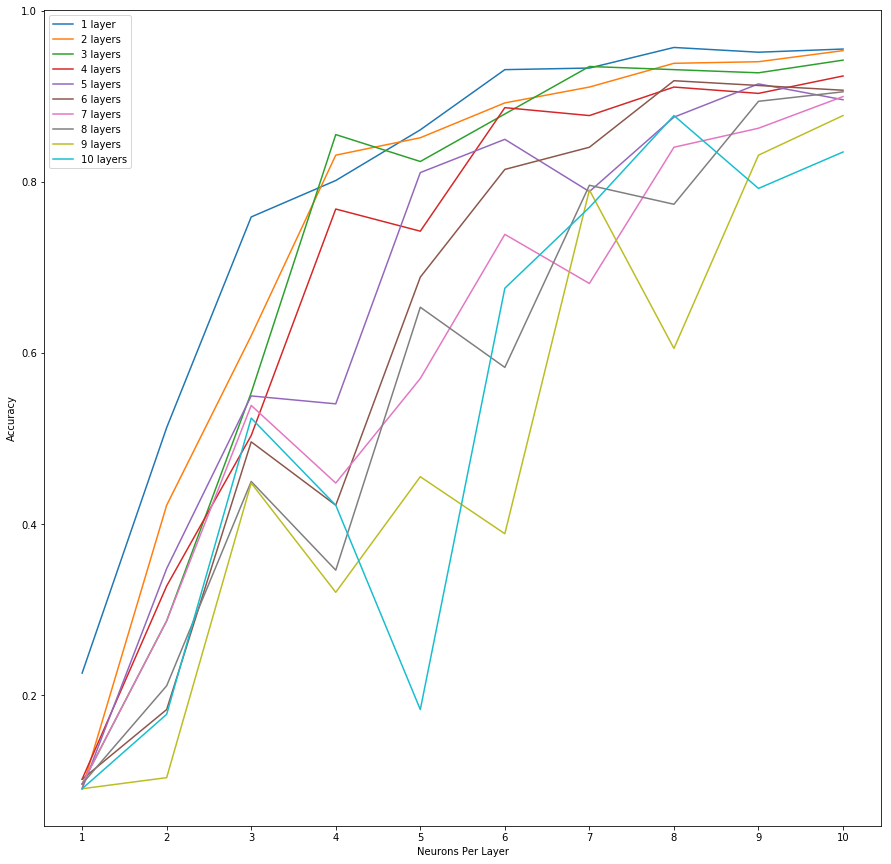

The best accuracy score is  0.9574074074074074
The optimal number of layers is  1
The optimal number of neurons per layer is  8
Wall time: 2min 1s


In [11]:
%%time
# 2(b)
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import warnings


warnings.filterwarnings('ignore')#ignore the ipython warnings 
# No handles with labels found to put in legend. 


# Sdandardize the data
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

plt.figure(figsize=(15,15))
plt.xlabel("Neurons Per Layer")
plt.ylabel("Accuracy")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])


num_layer_list = [1,2,3,4,5,6,7,8,9,10]
num_neuron_list = [1,2,3,4,5,6,7,8,9,10]
best_score = 0
best_num_layer = 0
best_num_neuron = 0
for num_layer in num_layer_list:
    accuracy_list = []  # store all the accuracy score
    for num_neuron in num_neuron_list:
        hidden_layer_size = []
        for i in range(num_layer):
            hidden_layer_size.append(num_neuron)
            
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size,random_state = 666)
        mlp.fit(X_train_std,y_train)
        current_accuracy = mlp.score(X_test_std, y_test)
        
        if best_score < current_accuracy:
            best_score = current_accuracy
            best_num_layer = num_layer
            best_num_neuron = num_neuron
            
        accuracy_list.append(current_accuracy)
    if num_layer == 1:
        plt.plot(num_layer_list,accuracy_list,label = "1 layer")
    else:
        
        plt.plot(num_layer_list,accuracy_list,label = "{} layers".format(num_layer))
    
plt.legend()  
plt.show()

print("The best accuracy score is ", best_score)
print("The optimal number of layers is ", best_num_layer)
print("The optimal number of neurons per layer is ", best_num_neuron)
